<a href="https://colab.research.google.com/github/kokikudo/submit_an_assignment/blob/master/Week2_session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### csv読み込み


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')   #マウントURL

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
csv_path = "/content/drive/My Drive/mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[:10], "\n", fuji[-10:])

[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]
 [   5.         35.142562  139.117679    0.       1611.      ]
 [   6.         35.144246  139.114799    6.62     1933.      ]
 [   7.         35.145929  139.111917    7.21     2255.      ]
 [   8.         35.147613  139.109036   12.2      2577.      ]
 [   9.         35.149297  139.106155   54.41     2899.      ]] 
 [[  290.          35.619638   138.291776  1918.68     93443.      ]
 [  291.          35.621302   138.288861  2102.67     93765.      ]
 [  292.          35.622966   138.285946  2213.03     94087.      ]
 [  293.          35.624629   138.28303   2158.71     94409.      ]
 [  294.          35.626293   138.280115  2084.51     94732.      ]
 [  295.          35.627957

### 問題1　データの可視化

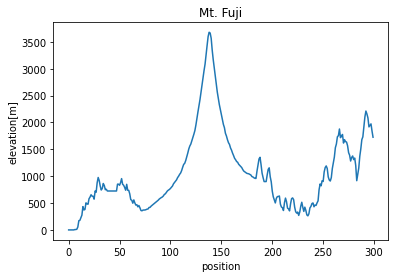

In [3]:
plt.title('Mt. Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
position = fuji[:, 0]   # 全配列の0列目の要素を取得
elevation = fuji[:, 3]   # 3列目の要素を取得 
plt.plot(position, elevation)
plt.show()

### 問題2　任意の地点の勾配を返す関数の作成

In [4]:
def compute_grandient(position, elevation):
    """
    今いる地点の勾配を計算
    parameters
    ----------------
    positon: int
    今いる地点
    elevations: ndarray, shape(n,)
    fujiから標高のみ取得した配列。nはデータの数。

    returns
    ----------------
    -1した地点との標高についての勾配を返す
    """
    return elevation[position] - elevation[position-1] 

In [5]:
#確認
position = 136
fuji_elevation = fuji[:, 3]
print('{}番目の地点の勾配:{}'.format(position, compute_grandient(position, fuji_elevation)))

136番目の地点の勾配:168.35000000000036


###問題3　移動先の地点を返す関数の作成

In [6]:
from decimal import Decimal, ROUND_HALF_UP

In [7]:
def compute_next_position(position, elevations, alpha=0.1):
    """
    次に移動する地点を計算する

    paramaters
    ----------------
    positon: int
    今いる地点
    elevations: ndarray, shape(n,)
    fujiから標高のみ取得した配列。nはデータの数。
    alpha: float or int
    学習率

    returns
    ----------------
    next_position_int: int
    次に移動する地点
    """
    next_point = position - (alpha * compute_grandient(position, elevations))
    next_point = np.maximum(1, next_point)  # 0以下になる場合、1を返す
    next_point = np.minimum(len(elevation)-1, next_point)   # 配列の範囲を超える場合に範囲内に収める
    next_point_int = int(Decimal(next_point).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
    return next_point_int


In [8]:
#確認
position = 150
elevation = fuji[:, 3]
alpha = 0.1

next_point = compute_next_position(position, elevation, alpha)

print('{}番目の地点の移動先は{}番目の地点'.format(position, next_point))

150番目の地点の移動先は159番目の地点


###問題4　山を下る関数

In [11]:
def descent_process(position, elevations, alpha):
    """
    移動地点が下がり切らなくなるまで各地点をリストに格納

    paramaters
    --------------- 
    position : int
    スタート地点

    returns 
    ----------------
    process : list
    各地点のリスト
    ---------------
    """
    process = [position]
    while process[-1] not in process[:-1]:
        next_position = compute_next_position(process[-1], elevations, alpha)
        process.append(next_position) 
    return process

In [24]:
position = 136
fuji_elevation = fuji[:, 3]
alpha = 0.2

descend_list = descent_process(position, fuji_elevation, alpha)

print('{}番目の地点からスタートした場合の下降工程のリスト\n{}'.format(position, descend_list))

136番目の地点からスタートした場合の下降工程のリスト
[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75]


### 問題5　下山過程の可視化

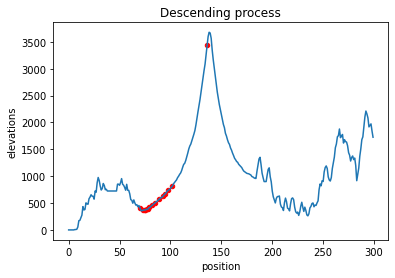

In [25]:
fuji_elevations = fuji[:, 3]
descend_elevations = fuji_elevations[descend_list]

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(fuji_elevations)
plt.scatter(descend_list, descend_elevations, 20, color='red')
plt.show()

### 問題6　初期値の変更
他の地点からスタートしたら、下山過程がどのように変化するか調べる。

[25, 36, 52, 37, 35, 43, 43]


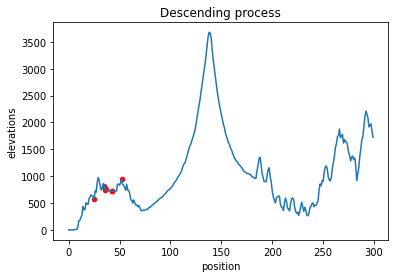

In [27]:
# スタート地点（初期値）が25の場合
fuji_elevations = fuji[:, 3]
descend_list = descent_process(25, fuji_elevations, 0.2)
descend_elevations = fuji_elevations[descend_list]
print(descend_list)

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(fuji_elevations)
plt.scatter(descend_list, descend_elevations, 20, color='red')
plt.show()

[50, 54, 58, 80, 80]


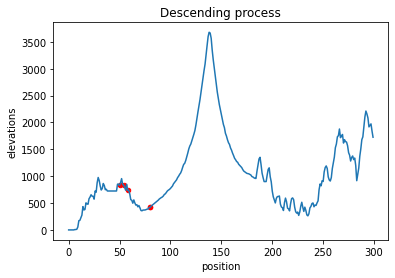

In [28]:
#50場合
fuji_elevations = fuji[:, 3]
descend_list = descent_process(50, fuji_elevations, 0.2)
descend_elevations = fuji_elevations[descend_list]
print(descend_list)

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(fuji_elevations)
plt.scatter(descend_list, descend_elevations, 20, color='red')
plt.show()

[150, 169, 173, 176, 177, 178, 180, 186, 164, 169]


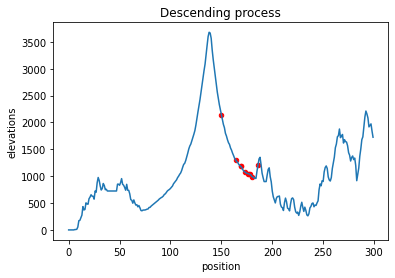

In [29]:
#150の場合
fuji_elevations = fuji[:, 3]
descend_list = descent_process(150, fuji_elevations, 0.2)
descend_elevations = fuji_elevations[descend_list]
print(descend_list)

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(fuji_elevations)
plt.scatter(descend_list, descend_elevations, 20, color='red')
plt.show()

[250, 253, 247, 226, 239, 228, 206, 205, 198, 231, 247]


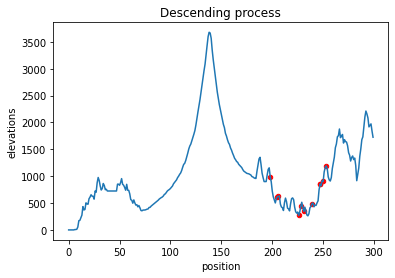

In [30]:
#250の場合
fuji_elevations = fuji[:, 3]
descend_list = descent_process(250, fuji_elevations, 0.2)
descend_elevations = fuji_elevations[descend_list]
print(descend_list)

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(fuji_elevations)
plt.scatter(descend_list, descend_elevations, 20, color='red')
plt.show()

[299, 299]


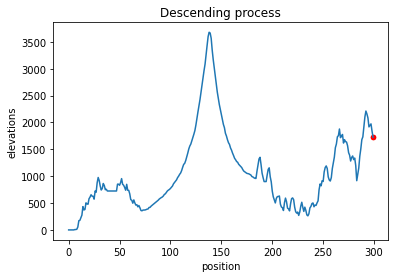

In [32]:
#299の場合
fuji_elevations = fuji[:, 3]
descend_list = descent_process(299, fuji_elevations, 0.2)
descend_elevations = fuji_elevations[descend_list]
print(descend_list)

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(fuji_elevations)
plt.scatter(descend_list, descend_elevations, 20, color='red')
plt.show()

なぜか登るケースが存在する

###問題7　学習率（ハイパーパラメータ）の変更

[250, 251, 233, 239, 234, 242, 239]


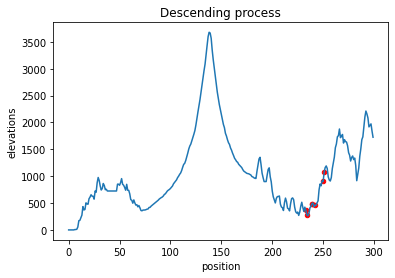

In [33]:
# alphaを0.1に変更
fuji_elevations = fuji[:, 3]
descend_list = descent_process(250, fuji_elevations, 0.1)
descend_elevations = fuji_elevations[descend_list]
print(descend_list)

plt.title('Descending process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(fuji_elevations)
plt.scatter(descend_list, descend_elevations, 20, color='red')
plt.show()

学習率0.2の時より精度が良くなった印象がある。

###感想
関数のなかで別の関数を呼び出そうとするとエラーが起きたり、頭が混乱してしまう。また、変数名が似たり寄ったりになり、何が格納されてるのかわからなくなってしまう事がよくあった。ぱっと見でわかるような変数名を付けるセンスが欲しいと思った。